<a href="https://colab.research.google.com/github/vimal-122002/project/blob/main/HILL_AND_VELLEY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Hill And Velley Prediction***

**Objective :**

# *To develop a machine learning model for hill and valley prediction using logistic regression methodology that can accurately classify geographic locations as hills or valleys based on a set of input features.The model will be trained on a labeled dataset of geographic features and their associated classifications, and then evaluated on a separate test dataset to measure its performance. The ultimate goal of this project is to provide a useful tool for identifying hills and valleys in different geographic locations, which may have important applications in fields such as geology, agriculture, and urban planning. italicized text*

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [4]:
df.describe(include = 'all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [5]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [6]:
print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


### Get Unique Value

In [7]:
df['Class'].value_counts()

0    606
1    606
Name: Class, dtype: int64

In [8]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


### **Define Target Variable(y) and Feature Variable(X)**

In [9]:
y = df['Class']
y.shape

(1212,)

In [10]:
X = df.drop('Class' , axis = 1)
X.shape

(1212, 100)

**Get plot of first two rows**

Text(0.5, 1.0, 'VELLEY')

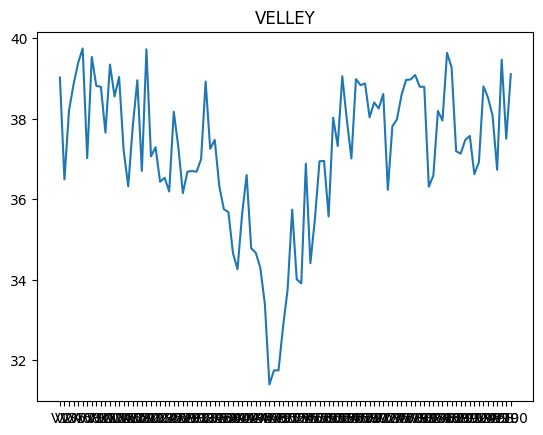

In [11]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[ 0 , :])
plt.title("VELLEY")

Text(0.5, 1.0, 'HILL')

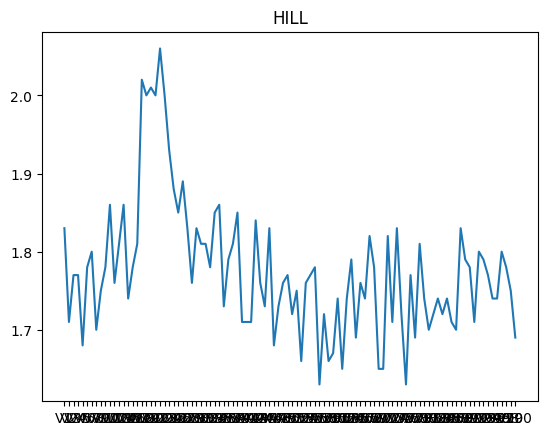

In [12]:
plt.plot(X.iloc[1,:])
plt.title('HILL')

*Get X variable Standardized**

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

**Train Test Split**

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 78)

**Get Model Train**

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

**Get Model Predection**

In [16]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

**Get Probability of each predicted classes**

In [17]:
lr.predict_proba(X_test)

array([[5.02274640e-01, 4.97725360e-01],
       [3.81683369e-01, 6.18316631e-01],
       [5.34232024e-01, 4.65767976e-01],
       [5.01798482e-01, 4.98201518e-01],
       [5.24880970e-01, 4.75119030e-01],
       [5.32911912e-01, 4.67088088e-01],
       [5.00918904e-01, 4.99081096e-01],
       [5.05107149e-01, 4.94892851e-01],
       [5.02206423e-01, 4.97793577e-01],
       [5.02224039e-01, 4.97775961e-01],
       [4.99683975e-01, 5.00316025e-01],
       [2.58343374e-01, 7.41656626e-01],
       [5.02215111e-01, 4.97784889e-01],
       [5.00565152e-01, 4.99434848e-01],
       [4.83380209e-01, 5.16619791e-01],
       [5.02238256e-01, 4.97761744e-01],
       [4.92347093e-01, 5.07652907e-01],
       [5.02213647e-01, 4.97786353e-01],
       [5.02164922e-01, 4.97835078e-01],
       [5.02228296e-01, 4.97771704e-01],
       [5.06773819e-01, 4.93226181e-01],
       [4.12000088e-02, 9.58799991e-01],
       [4.45829557e-01, 5.54170443e-01],
       [5.02434766e-01, 4.97565234e-01],
       [5.669601

**Get Model Evaluation**

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

In [19]:
print(confusion_matrix(y_test , y_pred))

[[178   1]
 [ 86  99]]


In [20]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80       179
           1       0.99      0.54      0.69       185

    accuracy                           0.76       364
   macro avg       0.83      0.76      0.75       364
weighted avg       0.83      0.76      0.75       364



**Get Future Predictions**

In [21]:
X_new = df.sample(1)
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
303,34790.01,36512.35,36578.07,33266.95,34902.42,34822.27,35361.27,29657.58,35134.18,31190.6,...,31568.43,33195.13,29656.35,31453.7,36390.18,35071.0,31039.61,36190.38,31316.89,0


In [22]:
X_new.shape

(1, 101)

In [23]:
X_new = X_new.drop('Class', axis = 1)
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
303,34790.01,36512.35,36578.07,33266.95,34902.42,34822.27,35361.27,29657.58,35134.18,31190.6,...,31329.99,31568.43,33195.13,29656.35,31453.7,36390.18,35071.0,31039.61,36190.38,31316.89


In [24]:
X_new.shape

(1, 100)

In [25]:
X_new = ss.fit_transform(X_new)
y_pred_new = lr.predict(X_new)
y_pred_new

array([1])

In [26]:
lr.predict_proba(X_new)

array([[0.49692022, 0.50307978]])